In [9]:
import numpy as np
from scipy.optimize import root
import numpy.linalg as la
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.linalg import solve_continuous_are
%matplotlib inline

In [14]:
def linearized_init(M, m, l, q1, q2, q3, q4, r):
    '''
    Parameters:
    ----------
    M, m: floats
    masses of the rickshaw and the present
    l   : float
    length of the rod
    q1, q2, q3, q4, r : floats
    relative weights of the position and velocity of the rickshaw,
    -
    the
    angular displacement theta and the change in theta, and the
    -
    control
    Return
    -------
    A : ndarray of shape (4,4)
    B : ndarray of shape (4,1)
    Q : ndarray of shape (4,4)
    R : ndarray of shape (1,1)
    '''
    g = 9.8
    Q = np.diag([q1,q2,q3,q4])
    R = np.array([[r]])
    A = np.array([[0.,1.,0.,1.],[0.,0.,(m*g)/M,0.],[0.,0.,0.,0.],[0.,0.,g/(M*l) * (M + m),0.]])
    #print np.shape(A)
    B = np.array([[0.,1./M,0.,1./(M*2l)]]).reshape(4,1)
    return A,B,Q,R

In [21]:
M, m = 23., 5.
l = 4.
q1, q2, q3, q4 = 1., 1., 1., 1.
r = 5.
A,B,Q,R = linearized_init(M, m, l, q1, q2, q3, q4, r)
def find_P(A, B, Q, R):
    '''
    Parameters:
    ----------
    A, Q    : ndarrays of shape (4,4)
    B       : ndarray of shape (4,1)
    R       : ndarray of shape (1,1)
    Returns
    -------
    P       : the matrix solution of the Riccati equation
    '''
    def Ricatti(P):
        P = P.reshape(4,4)
        return (P.dot(A) + A.T.dot(P) + Q - P.dot(B).dot(np.linalg.inv(R)).dot(B.T.dot(P))).reshape((16,))
    P = root(Ricatti,.1*np.ones((4,4)))
    return P['x'].reshape((4,4))
P = find_P(A,B,Q,R)
print P
eigenvalues = la.eig(A-(B.dot(np.linalg.inv(R))).dot(B.T.dot(P)))[0]
print "The Eigenvalues of A - BR^-1B.TP are ", eigenvalues

[[  8.07099993e-04  -5.42503279e-02   9.42962393e+01  -1.70940494e-03]
 [ -5.42743998e-02  -1.84939859e+01  -5.51514034e+00  -1.84525614e+01]
 [  9.42792978e+01   4.97630470e+01   3.40365371e+03  -6.95860290e+01]
 [ -1.71110409e-03  -1.84526653e+01   3.76699703e+01  -1.84817569e+01]]
The Eigenvalues of A - BR^-1B.TP are  [  1.75017025e-02  -1.78637609e-03  -7.52868055e-20   0.00000000e+00]


In [51]:
def rickshaw(tv, X0, A, B, Q, R, P):
    '''
    Parameters:
    ----------
    tv  : ndarray of time values, with shape (n+1,)
    X0  : Initial conditions on state variables
    A, Q: ndarrays of shape (4,4)
    B   : ndarray of shape (4,1)
    R   : ndarray of shape (1,1)
    P   : ndarray of shape (4,4)
    Returns
    -------
    Z : ndarray of shape (n+1,4), the state vector at each time
    U : ndarray of shape (n+1,), the control values
    '''
    def func(z,t):
        return (A-(B.dot(np.linalg.inv(R)).dot(B.T.dot(P)))).dot(z)
    #print len(X0)
    z_star= odeint(func,X0,tv)
    #rint np.shape(z_star)
    print np.shape(np.dot(B,B.T))
    print np.shape(P)
    print np.shape(A)
    #u_star = (A-B.dot(np.linalg.inv(R)).dot(B.T).dot(P)).dot(z_star.T)
    u_star= -np.linalg.inv(R).dot(B.T).dot(P).dot(z_star.T)
    return z_star,u_star

# Problem 4


(4, 4)
(4, 4)
(4, 4)


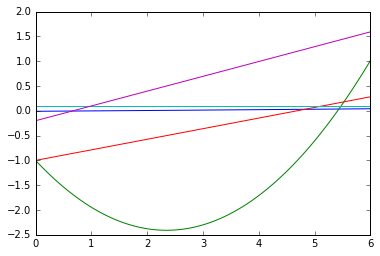

In [56]:
M, m = 23., 5.
l = 4.
q1, q2, q3, q4 = 1., 1., 1., 1.
r = 10.
tf1 = 6
tf2 = 60
X0 = np.array([-1, -1, .1, -.2])
A,B,Q,R = linearized_init(M, m, l, q1, q2, q3, q4, r)
P1 = find_P(A,B,Q,R)
print 
#P2 = solve_continuous_are(A,B,Q,R)
tv1 = np.linspace(0,tf1,100)
#tv2 = np.linspace(0,tf2,100)
#print np.shape(tv)
z_star1,u_star1 = rickshaw(tv1,X0,A,B,Q,R,P1)
z_star1 = z_star1.T

#z_star2,u_star2 = rickshaw(tv2,X0,A,B,Q,R,P2)
#z_star2 = z_star2.T

plt.plot(tv1,u_star1.T)
plt.plot(tv1,z_star1[0,:])
plt.plot(tv1,z_star1[1,:])
plt.plot(tv1,z_star1[2,:])
plt.plot(tv1,z_star1[3,:])
plt.show()

# Problem 5

(4, 4)
(4, 4)
(4, 4)


ValueError: x and y must have same first dimension

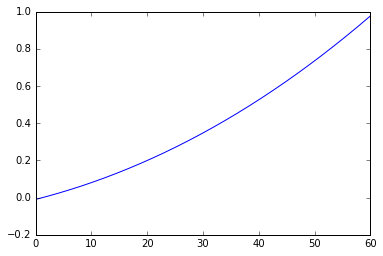

In [58]:
M, m = 23., 5.
l = 4.
q1, q2, q3, q4 = 1., 1., 1., 1.
r = 10.
tf = 60
X0 = np.array([-1, -1, .1, -.2])
A,B,Q,R = linearized_init(M, m, l, q1, q2, q3, q4, r)
P = find_P(A,B,Q,R)
tv = np.linspace(0,tf,500)
z_star,u_star = rickshaw(tv,X0,A,B,Q,R,P)
plt.plot(tv,u_star.T)
plt.plot(tv,z_star[0,:])
plt.plot(tv,z_star[1,:])
plt.plot(tv,z_star[2,:])
plt.plot(tv,z_star[3,:])
plt.show()

In [30]:
np.random.random((4,4))

array([[ 0.5907369 ,  0.61190739,  0.07862394,  0.3476923 ],
       [ 0.63260282,  0.25715933,  0.20898123,  0.18493034],
       [ 0.88058729,  0.86136087,  0.9754656 ,  0.09053338],
       [ 0.97846618,  0.96615254,  0.52526887,  0.2972555 ]])

In [2]:
np.diag([1,2,3,4])

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])